In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [6]:
categorical_x = ['species', 'island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [9]:
# escalador = StandardScaler()
# escalador.fit(X_train)

# X_train = escalador.transform(X_train)
# X_test = escalador.transform(X_test)

## Model implementation

In [10]:
model = GradientBoostingRegressor()

In [11]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [12]:
base_preds = model.predict(X_test)

## Evaluation

In [13]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, base_preds)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, base_preds)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, base_preds))}')

Mean Absolute Error: 254.45010222572603
Mean Squared Error: 96189.63785848263
Root Mean Squared Error: 310.14454349300206


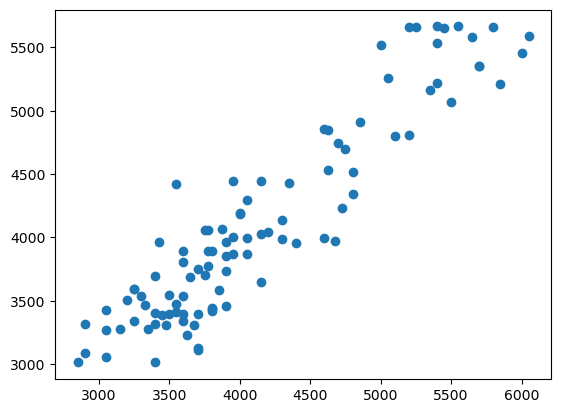

In [14]:
plt.scatter(y_test, base_preds)

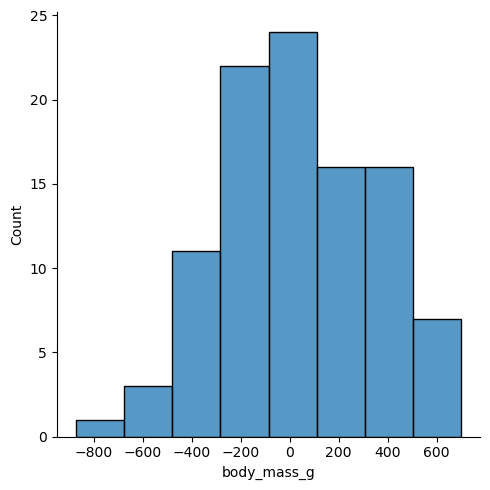

In [15]:
sns.displot(y_test- base_preds)

In [16]:
model.feature_importances_

array([3.34708660e-03, 6.23236235e-01, 4.38858419e-04, 2.26885293e-03,
       1.72906894e-01, 4.59686406e-02, 3.05544104e-02, 1.21279021e-01])

In [17]:
df_feature_importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
species_Gentoo,0.623236
sex_Male,0.172907
flipper_length_mm,0.121279
bill_length_mm,0.045969
bill_depth_mm,0.030554
species_Chinstrap,0.003347
island_Torgersen,0.002269
island_Dream,0.000439


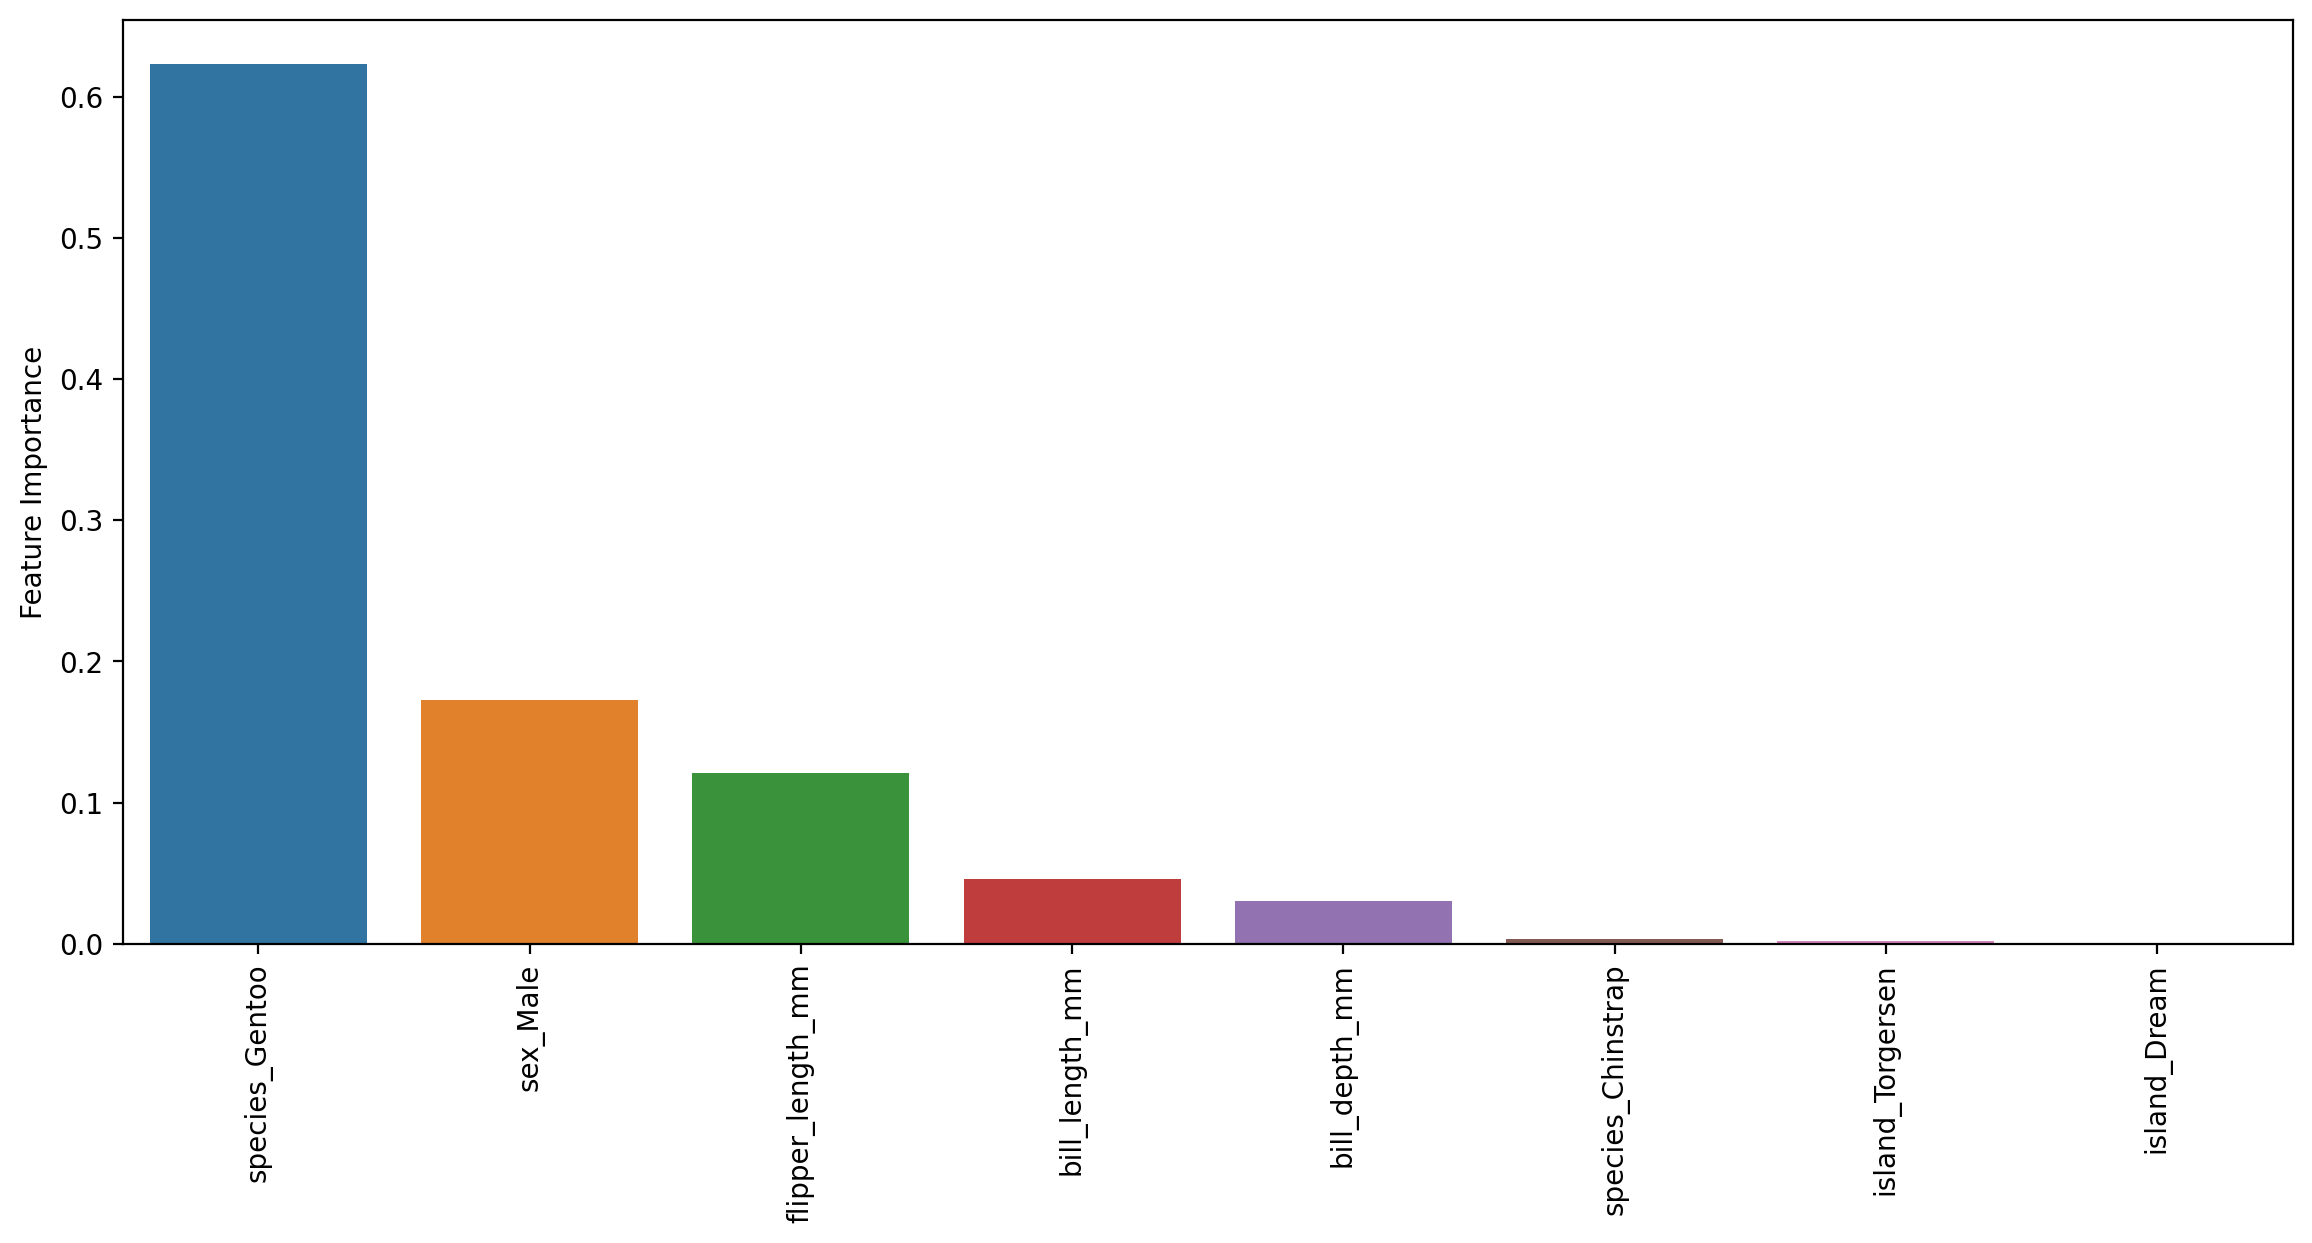

In [18]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df_feature_importance,x=df_feature_importance.index,y='Feature Importance')
plt.xticks(rotation=90);

## Grid Search

In [33]:
df_pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Dream,37.5,18.5,199.0,4475.0,Male
1,Adelie,Dream,37.6,19.3,181.0,3300.0,Female
2,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
3,Chinstrap,Dream,50.8,18.5,201.0,4450.0,Male
4,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
...,...,...,...,...,...,...,...
328,Adelie,Dream,39.6,18.1,186.0,4450.0,Male
329,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,Male
330,Gentoo,Biscoe,47.5,15.0,218.0,4950.0,Female
331,Adelie,Torgersen,37.3,20.5,199.0,3775.0,Male


In [19]:
model = GradientBoostingRegressor()

In [20]:
parametros = {"n_estimators":[1,5,10,20,40,100],
              'max_depth':[3,4,5,6], 
             'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.2]}

In [21]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

In [22]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='neg_mean_squared_error')

In [23]:
grid_model.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [24]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [25]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 251.7550867153481
Mean Squared Error: 93486.50899583288
Root Mean Squared Error: 305.75563608187645


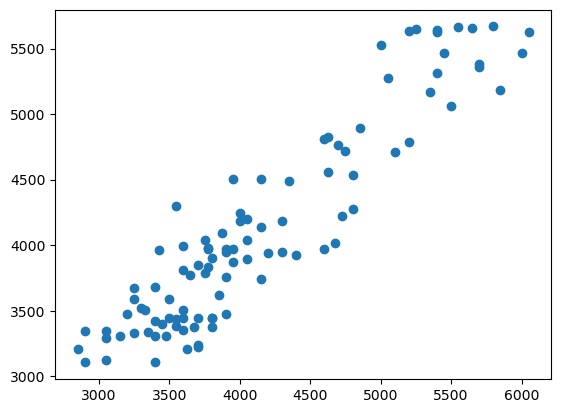

In [26]:
plt.scatter(y_test, y_pred)

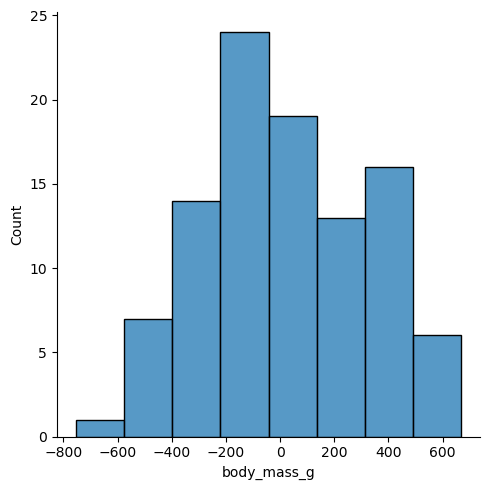

In [27]:
sns.displot(y_test- y_pred)

In [28]:
grid_model.best_estimator_.feature_importances_

array([2.64924641e-03, 6.39462104e-01, 5.91588426e-04, 1.60103099e-03,
       1.77118318e-01, 3.49448192e-02, 2.44223309e-02, 1.19210562e-01])

In [29]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
species_Gentoo,0.639462
sex_Male,0.177118
flipper_length_mm,0.119211
bill_length_mm,0.034945
bill_depth_mm,0.024422
species_Chinstrap,0.002649
island_Torgersen,0.001601
island_Dream,0.000592


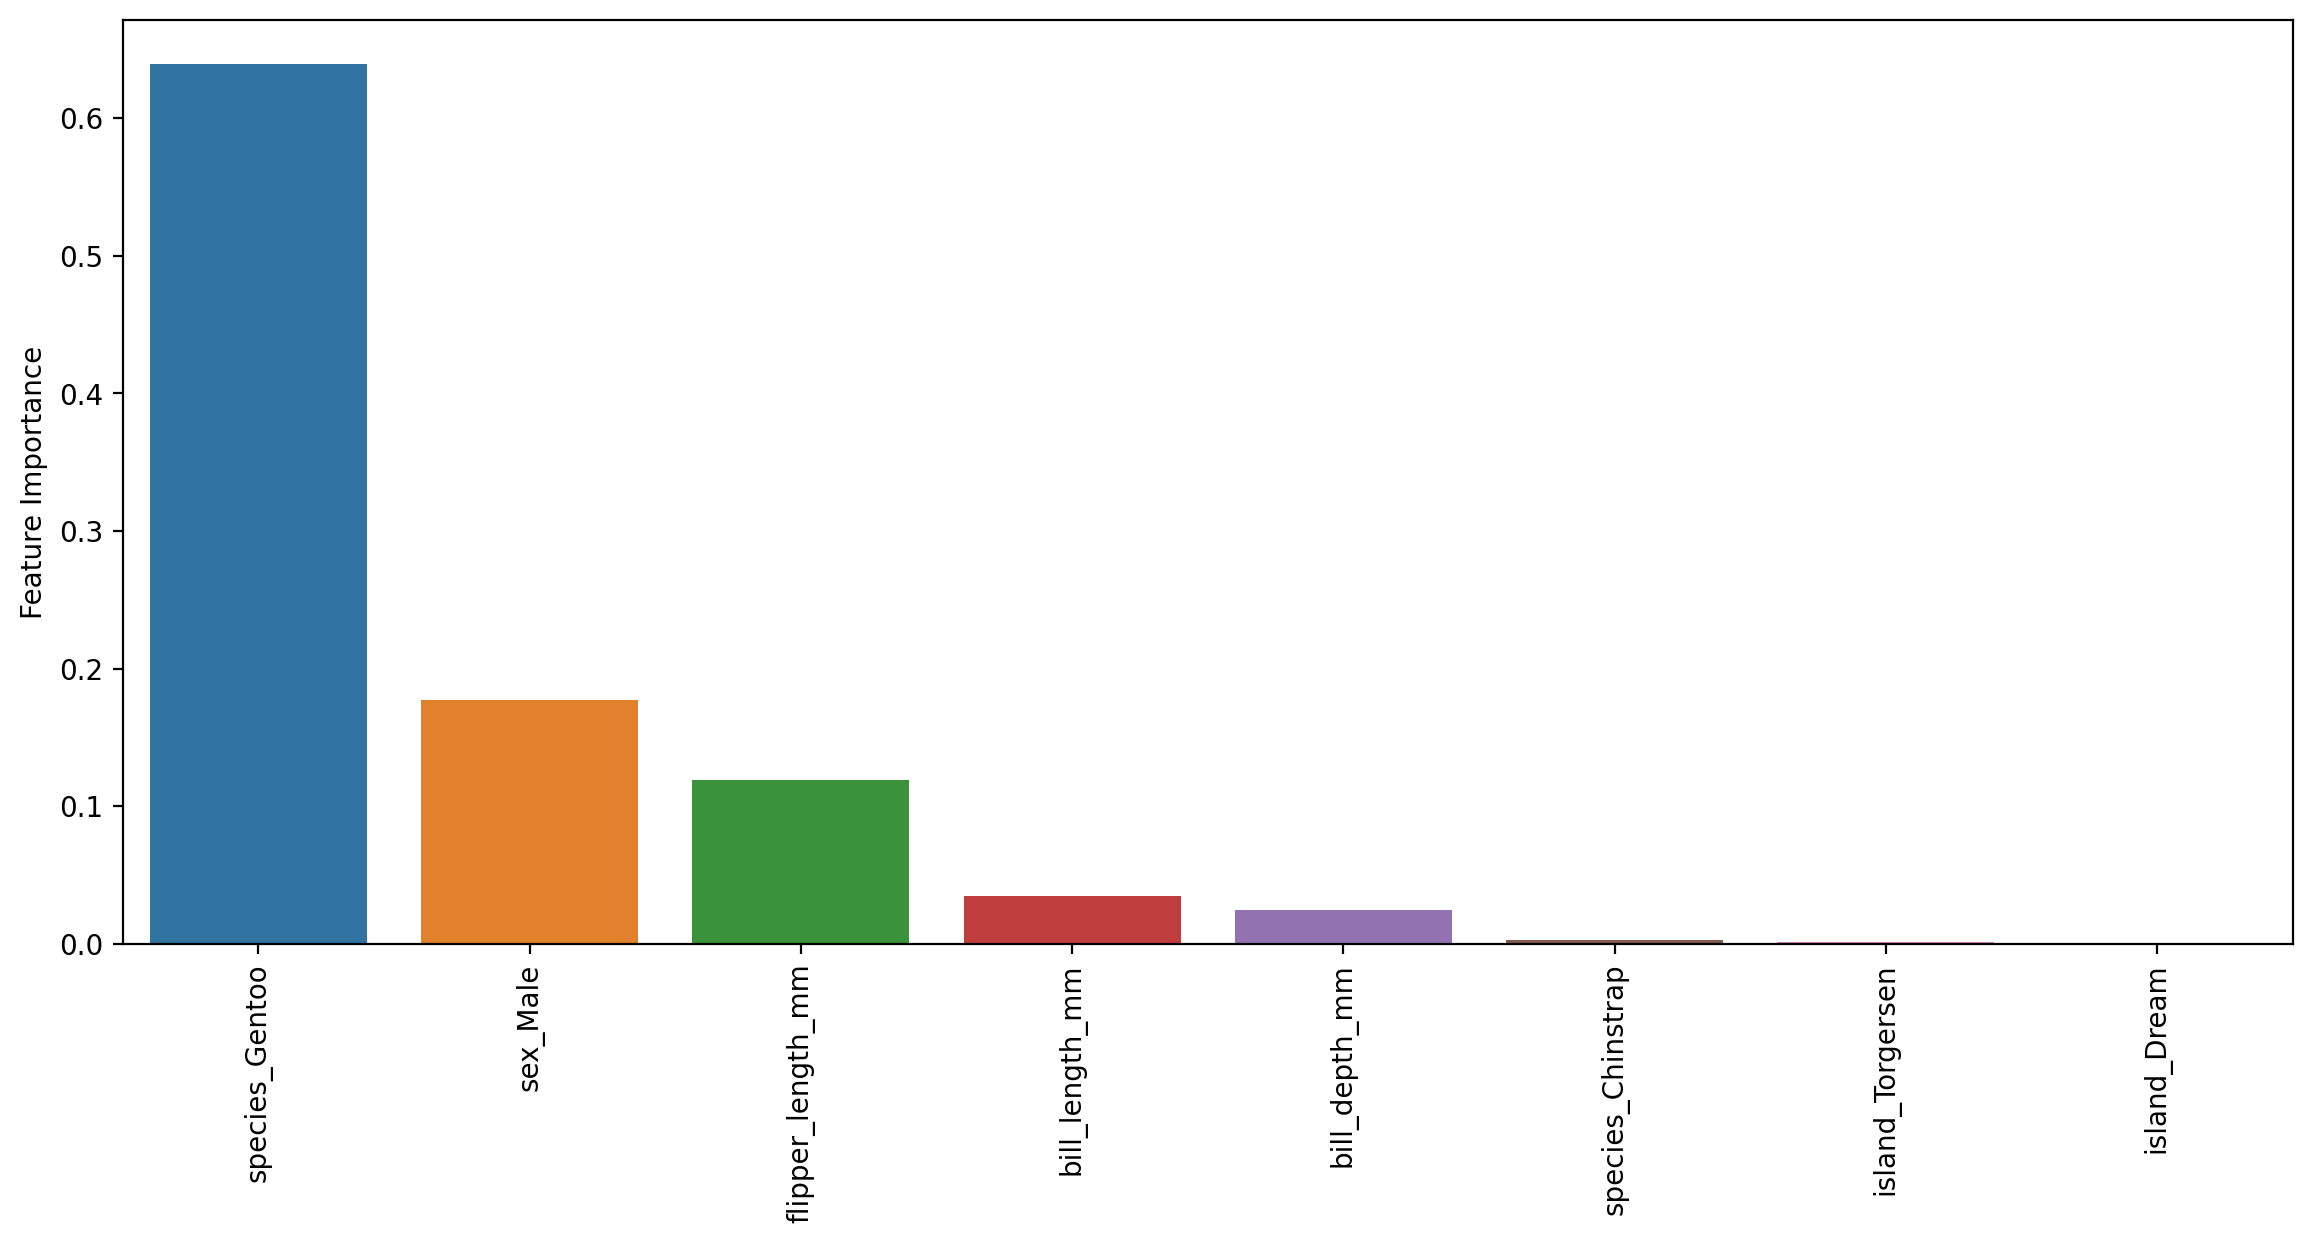

In [30]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df_feature_importance,x=df_feature_importance.index,y='Feature Importance')
plt.xticks(rotation=90);

## Elbow

In [31]:
errors = []

for n in range(1,128):
    rfc = GradientBoostingRegressor( n_estimators=n)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = metrics.mean_squared_error(preds,y_test)
    errors.append(err)

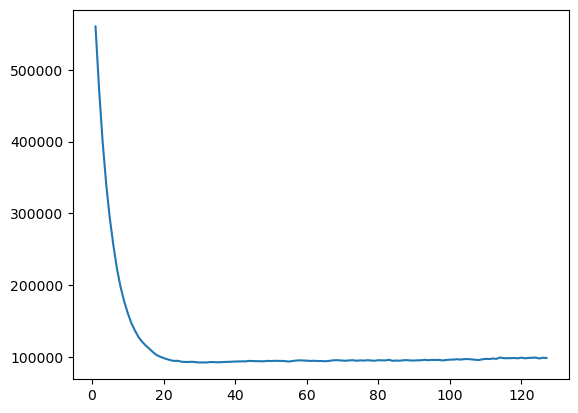

In [32]:
plt.plot(range(1,128),errors)